# Analysing Boston AirBnB Data
In today’s date, there are more than thousands of rental spaces in a single state where in you could stay for your work or vacation. It could be for a few days or could be for a few weeks, doesn’t matter! It sometimes is overwhelming to come across so many options at once and it becomes difficult to choose.

Thats when AirBnB comes in. Airbnb, Inc. is an American vacation rental online marketplace company based in San Francisco, California, United States. Airbnb maintains and hosts a marketplace, accessible to consumers on its website or via an app. It is one of the world’s fastest growing holiday website. Airbnb takes 3% commission of every booking from hosts, and between 6% and 12% from guests. There’s plenty of criteria to list for/search a property: from a shared room to an entire house, to having a swimming pool to having a washing machine. There are photos of the property, and the hosts/guests, with full map listing.

In this analysis, we analyse AirBnB's actual data in the city of Boston using the CRISP-DM process.

## __TABLE OF CONTENTS__
1. [Business Understanding](#businessunderstanding)
2. [Data Understanding](#dataunderstanding)
3. [Preparing the data](#preparingthedata)
4. [Modelling the data](#modellingthedata)
5. [Results](#results)

## 1. Business Understanding
<a id='businessunderstanding'></a>
1. In which month do the property prices peak?
2. Do super hosts outperform hosts?
3. Does room type affect the pricing?
4. Predict pricing using features that relate to price

### Gathering Data

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sb
from functools import reduce
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 2. Data Understanding
<a id='dataunderstanding'></a>

### Assessing Data

In [2]:
boston_calendars = pd.read_csv('Boston Data/calendar.csv')
boston_listings = pd.read_csv('Boston Data/listings.csv')
boston_reviews = pd.read_csv('Boston Data/reviews.csv')

In [3]:
boston_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [4]:
boston_listings.experiences_offered.value_counts()

none    3585
Name: experiences_offered, dtype: int64

In [5]:
boston_listings.sample(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1961,10164810,https://www.airbnb.com/rooms/10164810,20160906204935,2016-09-07,Prudential/South End 1BR Apt.,The apartments have new kitchenettes with a fu...,The comfortable living room has a sofa (not pu...,The apartments have new kitchenettes with a fu...,none,These apartments are in an architecturally ren...,NaN,"The area abounds with restaurants, markets, sh...",NaN,NaN,NaN,NaN,NaN,https://a2.muscache.com/im/pictures/85038139-b...,NaN,51673899,https://www.airbnb.com/users/show/51673899,Harriette Ferne,2015-12-18,"Boston, Massachusetts, United States","The Bed and Breakfast Agency of Boston, we hav...",within a day,77%,33%,f,https://a2.muscache.com/im/pictures/a83a0b23-8...,https://a2.muscache.com/im/pictures/a83a0b23-8...,Back Bay,16,16,"['email', 'phone', 'reviews']",t,f,"Columbus Avenue, Boston, MA 02118, United States",NaN,Beacon Hill,NaN,Boston,MA,02118,Boston,"Boston, MA",US,United States,42.356558,-71.072795,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$179.00,NaN,NaN,NaN,NaN,1,$0.00,2,1125,2 days ago,NaN,19,49,79,354,2016-09-06,6,2016-02-28,2016-06-26,90.0,9.0,9.0,9.0,9.0,10.0,8.0,f,NaN,NaN,f,strict,f,f,14,0.93
3392,10021398,https://www.airbnb.com/rooms/10021398,20160906204935,2016-09-07,"Charming room in Boston, MA",This cozy room fits comfortably 2 people in a ...,I am a friendly postdoctoral fellow from Harva...,This cozy room fits comfortably 2 people in a ...,none,NaN,NaN,In front of my street is the 57 bus stop that ...,I currently live in the apt and the guest will...,NaN,NaN,https://a2.muscache.com/im/pictures/6c692e47-e...,https://a2.muscache.com/im/pictures/6c692e47-e...,https://a2.muscache.com/im/pictures/6c692e47-e...,https://a2.muscache.com/im/pictures/6c692e47-e...,20327499,https://www.airbnb.com/users/show/20327499,Renata,2014-08-20,"Boston, Massachusetts, United States",I finished my PhD in 2011 in Biochemistry. I l...,within a day,90%,95%,f,https://a2.muscache.com/im/pictures/1759b969-a...,https://a2.muscache.com/im/pictures/1759b969-a...,NaN,1,1,"['email', 'phone', 'reviews']",t,f,"Barrows Street, Boston, MA 02134, United States",NaN,Allston,NaN,Boston,MA,02134,Boston,"Boston, MA",US,United States,42.351735,-71.137625,f,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",Kitchen,""Pets live on thi...",NaN,$70.00,NaN,NaN,NaN,$5.00,1,$0.00,1,3,2 months ago,NaN,2,23,53,328,2016-09-06,22,2016-03-09,2016-08-28,93.0,10.0,10.0,10.0,9.0,9.0,9.0,f,NaN,NaN,f,flexible,f,f,1,3.61
642,916123,https://www.airbnb.com/rooms/916123,201609062

In [6]:
boston_listings.neighbourhood_cleansed.value_counts()

Jamaica Plain              343
South End                  326
Back Bay                   302
Fenway                     290
Dorchester                 269
Allston                    260
Beacon Hill                194
Brighton                   185
South Boston               174
Downtown                   172
East Boston                150
Roxbury                    144
North End                  143
Mission Hill               124
Charlestown                111
South Boston Waterfront     83
Chinatown                   71
Roslindale                  56
West End                    49
West Roxbury                46
Hyde Park                   31
Mattapan                    24
Bay Village                 24
Longwood Medical Area        9
Leather District             5
Name: neighbourhood_cleansed, dtype: int64

### Quality Issues
`boston_listings_df` table:
1. remove \$ & comma sign from price column
2. rename id to listing_id

`master_df` table:
1. remove \$ & comma sign from price_right, security_deposit, cleaning_fee columns
2. NaN values in price_right column 
3. date column has datatype object instead of datetime
4. rename price_left to price
5. NaN values in host_response_time, property_type, review_score_rating, beds, bedrooms, bathrooms, cleaning_fee, security_deposit, reviews_per_month columns

### Tidiness Issues
`boston_listings` table:
1. use only columns - 'id', 'name', 'host_name', 'host_location', 'host_response_time', 'host_is_superhost', 'host_total_listings_count', 'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'market', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'number_of_reviews', 'review_scores_rating', 'cancellation_policy', 'reviews_per_month', 'cleaning_fee', 'security_deposit' for analysis

`boston_listings_df` table:
1. join boston_listings_df with boston_calendars using listing_id as key


`master_df` table:
1. drop price_left column
2. extract month from date column into new column named month
3. clean amenities column
4. drop price_right column

## 3. Preparing The Data
<a id='preparingthedata'></a>

## Cleaning Data

#### Define
Use columns which will be used for analysis 'id', 'name', 'host_name', 'host_location', 'host_response_time', 'host_is_superhost', 'host_total_listings_count', 'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'market', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'number_of_reviews', 'review_scores_rating', 'cancellation_policy', 'reviews_per_month', 'cleaning_fee', 'security_deposit'

#### Code

In [7]:
boston_listing_df = boston_listings[['id', 'name', 'host_name', 'host_location', 'host_response_time', 'host_is_superhost', 'host_total_listings_count', 'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'market', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'number_of_reviews', 'review_scores_rating', 'cancellation_policy', 'reviews_per_month', 'cleaning_fee', 'security_deposit']]

#### Test

In [8]:
boston_listing_df.head()

,id,name,host_name,host_location,host_response_time,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,city,state,zipcode,market,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,cleaning_fee,security_deposit
0,12147973,Sunny Bungalow in the City,Virginia,"Boston, Massachusetts, United States",NaN,f,1,Roslindale,Boston,MA,02131,Boston,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,0,NaN,moderate,NaN,$35.00,NaN
1,3075044,Charming room in pet friendly apt,Andrea,"Boston, Massachusetts, United States",within an hour,f,1,Roslindale,Boston,MA,02131,Boston,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$65.00,36,94.0,moderate,1.30,$10.00,$95.00
2,6976,Mexican Folk Art Haven in Boston,Phil,"Boston, Massachusetts, United States",within a few hours,t,1,Roslindale,Boston,MA,02131,Boston,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",$65.00,41,98.0,moderate,0.47,NaN,NaN
3,1436513,Spacious Sunny Bedroom Suite in Historic Home,Meghna,"Boston, Massachusetts, United States",within a few hours,f,1,Roslindale,Boston,MA,NaN,Boston,House,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$75.00,1,100.0,moderate,1.00,$50.00,$100.00
4,7651065,Come Home to Boston,Linda,"Boston, Massachusetts, United States",within an hour,t,1,Roslindale,Boston,MA,02131,Boston,House,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",$79.00,29,99.0,flexible,2.25,$15.00,NaN


#### Define
Rename id column to listing_id

#### Code

In [9]:
boston_listing_df.rename(columns = {'id' : 'listing_id'}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### Test

In [10]:
boston_listing_df.head()

,listing_id,name,host_name,host_location,host_response_time,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,city,state,zipcode,market,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,cleaning_fee,security_deposit
0,12147973,Sunny Bungalow in the City,Virginia,"Boston, Massachusetts, United States",NaN,f,1,Roslindale,Boston,MA,02131,Boston,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,0,NaN,moderate,NaN,$35.00,NaN
1,3075044,Charming room in pet friendly apt,Andrea,"Boston, Massachusetts, United States",within an hour,f,1,Roslindale,Boston,MA,02131,Boston,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$65.00,36,94.0,moderate,1.30,$10.00,$95.00
2,6976,Mexican Folk Art Haven in Boston,Phil,"Boston, Massachusetts, United States",within a few hours,t,1,Roslindale,Boston,MA,02131,Boston,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",$65.00,41,98.0,moderate,0.47,NaN,NaN
3,1436513,Spacious Sunny Bedroom Suite in Historic Home,Meghna,"Boston, Massachusetts, United States",within a few hours,f,1,Roslindale,Boston,MA,NaN,Boston,House,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$75.00,1,100.0,moderate,1.00,$50.00,$100.00
4,7651065,Come Home to Boston,Linda,"Boston, Massachusetts, United States",within an hour,t,1,Roslindale,Boston,MA,02131,Boston,House,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",$79.00,29,99.0,flexible,2.25,$15.00,NaN


#### Define
Remove \$ and comma sign from price column

#### Code

In [11]:
boston_listing_df['price'] = boston_listing_df['price'].str.replace('$', '')
boston_listing_df['price'] = boston_listing_df['price'].str.replace(',', '')
boston_listing_df['price'] = boston_listing_df['price'].astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

#### Test

In [12]:
boston_listing_df.head()

,listing_id,name,host_name,host_location,host_response_time,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,city,state,zipcode,market,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,cleaning_fee,security_deposit
0,12147973,Sunny Bungalow in the City,Virginia,"Boston, Massachusetts, United States",NaN,f,1,Roslindale,Boston,MA,02131,Boston,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",250.0,0,NaN,moderate,NaN,$35.00,NaN
1,3075044,Charming room in pet friendly apt,Andrea,"Boston, Massachusetts, United States",within an hour,f,1,Roslindale,Boston,MA,02131,Boston,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",65.0,36,94.0,moderate,1.30,$10.00,$95.00
2,6976,Mexican Folk Art Haven in Boston,Phil,"Boston, Massachusetts, United States",within a few hours,t,1,Roslindale,Boston,MA,02131,Boston,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",65.0,41,98.0,moderate,0.47,NaN,NaN
3,1436513,Spacious Sunny Bedroom Suite in Historic Home,Meghna,"Boston, Massachusetts, United States",within a few hours,f,1,Roslindale,Boston,MA,NaN,Boston,House,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",75.0,1,100.0,moderate,1.00,$50.00,$100.00
4,7651065,Come Home to Boston,Linda,"Boston, Massachusetts, United States",within an hour,t,1,Roslindale,Boston,MA,02131,Boston,House,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",79.0,29,99.0,flexible,2.25,$15.00,NaN


#### Define
Join boston_listing_df with boston_calendars using key as listing_id

#### Code

In [13]:
master_df = boston_listing_df.set_index('listing_id').join(boston_calendars.set_index('listing_id'), lsuffix='_left', rsuffix='_right')
master_df.reset_index(inplace=True)

#### Test

In [14]:
master_df.sample(10)

,listing_id,name,host_name,host_location,host_response_time,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,city,state,zipcode,market,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price_left,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,cleaning_fee,security_deposit,date,available,price_right
354584,5125723,Beautiful flat steps from BackBay,Spiro,Boston and London,within a day,f,1,Fenway,Boston,MA,02115,Boston,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",100.0,29,97.0,moderate,1.60,$60.00,NaN,2017-02-06,t,$100.00
852928,11211273,The Best Location In Boston,Jesse,"Boston, Massachusetts, United States",within an hour,f,2,Back Bay,Boston,MA,02116,Boston,Townhouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",199.0,24,93.0,strict,3.69,$29.00,$100.00,2016-11-21,t,$199.00
337961,4863101,Ensuite Private Room in Boston,Dan,"Boston, Massachusetts, United States",within a few hours,f,2,South Boston,Boston,MA,02127,Boston,House,Private room,2,1.5,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",130.0,95,93.0,moderate,4.93,NaN,$100.00,2016-10-04,t,$122.00
642344,8454985,Modern Navy Yard Apartment,Jianmin,"Boston, Massachusetts, United States",within a day,f,3,Charlestown,Charlestown,MA,02129,Boston,Apartment,Entire home/apt,3,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",225.0,7,97.0,moderate,0.59,$50.00,$150.00,2017-06-25,f,NaN
1267450,14723758,Cozy studio in back bay,Luisa,"Boston, Massachusetts, United States",within a few hours,f,2,Back Bay,Boston,MA,02116,Boston,Loft,Entire home/apt,3,1.0,0.0,1.0,Real Bed,"{""Wireless Internet"",Kitchen,""Smoke Detector"",...",166.0,0,NaN,flexible,NaN,NaN,NaN,2017-01-21,f,NaN
310521,4538423,"Cozy, Funky JP Condo",Anna,"Boston, Massachusetts, United States",within a day,f,1,Jamaica Plain,Boston,MA,02130,Boston,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",37.0,0,NaN,strict,NaN,$30.00,NaN,2016-11-19,f,NaN
398218,5870922,Sunset Room near Harvard Square (BR 2),Todd,"Boston, Massachusetts, United States",within an hour,f,24,Allston,Boston,MA,02134,Boston,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",91.0,46,96.0,strict,2.72,$25.00,NaN,2017-09-02,f,NaN
675843,8822499,Beautiful Back Bay apartment 4 you!,Carolina,"Boston, Massachusetts, United States",within a few hours,f,1,Back Bay,Boston,MA,02115,Boston,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",200.0,4,100.0,moderate,0.77,$60.00,$100.00,2017-08-11,t,$200.00
723529,9470342,Christmas Room,Bendik,"Bergen, Hordaland, Norway",NaN,f,2,Allston,Boston,MA,02134,Boston,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",Kitchen,""Buzzer/Wireless ...",50.0,1,100.0,flexible,0.12,NaN,NaN,2017-05-29,f,NaN
528547,7434871,Theater District 2 LEVEL LOFT!,Lee,"Boston, Massachusetts, United States",within an hour,f,1,Chinatown,Boston,MA,02111,Boston,Condominium,Entire home/apt,8,1.0,3.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",383.0,57,86.0,strict,4.22,$70.00,NaN,2017-07-27,f,NaN


#### Define
Remove \$ & comma sign from price_right, security_deposit, cleaning_fee columns

#### Code

In [15]:
master_df['price_right'] = master_df['price_right'].str.replace('$', '')
master_df['price_right'] = master_df['price_right'].str.replace(',', '')
master_df['cleaning_fee'] = master_df['cleaning_fee'].str.replace('$', '')
master_df['cleaning_fee'] = master_df['cleaning_fee'].str.replace(',', '')
master_df['security_deposit'] = master_df['security_deposit'].str.replace('$', '')
master_df['security_deposit'] = master_df['security_deposit'].str.replace(',', '')

#### Test

In [16]:
master_df.head(10)

,listing_id,name,host_name,host_location,host_response_time,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,city,state,zipcode,market,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price_left,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,cleaning_fee,security_deposit,date,available,price_right
0,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",40.0,34,90.0,strict,0.38,50.00,100.00,2017-09-05,t,36.00
1,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",40.0,34,90.0,strict,0.38,50.00,100.00,2017-09-04,t,36.00
2,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",40.0,34,90.0,strict,0.38,50.00,100.00,2017-09-03,t,36.00
3,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",40.0,34,90.0,strict,0.38,50.00,100.00,2017-09-02,t,36.00
4,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",40.0,34,90.0,strict,0.38,50.00,100.00,2017-09-01,t,36.00
5,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",40.0,34,90.0,strict,0.38,50.00,100.00,2017-08-31,t,36.00
6,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",40.0,34,90.0,strict,0.38,50.00,100.00,2017-08-30,t,36.00
7,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",40.0,34,90.0,strict,0.38,50.00,100.00,2017-08-29,t,36.00
8,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",40.0,34,90.0,strict,0.38,50.00,100.00,2017-08-28,t,36.00
9,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",40.0,34,90.0,strict,0.38,50.00,100.00,2017-08-27,t,36.00


#### Define
Fix NaN values in price_right column by imputing values from price_left column

#### Code

In [17]:
master_df['price_right'].fillna(master_df['price_left'], inplace=True)
master_df['price_right'] = master_df['price_right'].astype(float)

#### Test

In [18]:
master_df.price_right.isna().sum()

0

In [19]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   listing_id                 1308890 non-null  int64  
 1   name                       1308890 non-null  object 
 2   host_name                  1308890 non-null  object 
 3   host_location              1304875 non-null  object 
 4   host_response_time         1136975 non-null  object 
 5   host_is_superhost          1308890 non-null  object 
 6   host_total_listings_count  1308890 non-null  int64  
 7   neighbourhood_cleansed     1308890 non-null  object 
 8   city                       1308160 non-null  object 
 9   state                      1308890 non-null  object 
 10  zipcode                    1295020 non-null  object 
 11  market                     1303780 non-null  object 
 12  property_type              1307795 non-null  object 
 13  room_type   

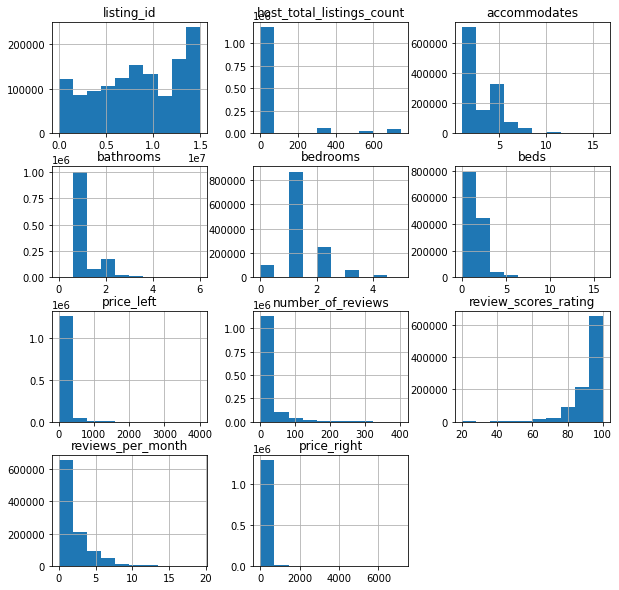

In [20]:
master_df.hist(figsize=(10,10));

In [21]:
master_df.room_type.value_counts()

Entire home/apt    776720
Private room       502970
Shared room         29200
Name: room_type, dtype: int64

#### Define
Fix date column into datetime datatype instead of object

#### Code

In [22]:
master_df['date'] = pd.to_datetime(master_df['date'])

#### Test

In [23]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   listing_id                 1308890 non-null  int64         
 1   name                       1308890 non-null  object        
 2   host_name                  1308890 non-null  object        
 3   host_location              1304875 non-null  object        
 4   host_response_time         1136975 non-null  object        
 5   host_is_superhost          1308890 non-null  object        
 6   host_total_listings_count  1308890 non-null  int64         
 7   neighbourhood_cleansed     1308890 non-null  object        
 8   city                       1308160 non-null  object        
 9   state                      1308890 non-null  object        
 10  zipcode                    1295020 non-null  object        
 11  market                     1303780 no

#### Define
Create a new column named month which will contain the month extracted from the date column

#### Code

In [24]:
master_df['month'] = pd.DatetimeIndex(master_df['date']).month
mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}
master_df.replace({'month': mapping}, inplace=True)

#### Test

In [25]:
master_df.month.value_counts()

Jan    111166
May    111166
Oct    111166
Mar    111166
Jul    111166
Dec    111166
Aug    111166
Sep    107580
Apr    107580
Nov    107580
Jun    107580
Feb    100408
Name: month, dtype: int64

#### Define
Drop price_left column & rename price_right column to price

#### Code

In [26]:
master_df.drop('price_left', axis=1, inplace=True)
master_df.rename(columns = {'price_right':'price'}, inplace=True)

#### Test

In [27]:
master_df.head()

,listing_id,name,host_name,host_location,host_response_time,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,city,state,zipcode,market,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,cleaning_fee,security_deposit,date,available,price,month
0,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",34,90.0,strict,0.38,50.00,100.00,2017-09-05,t,36.0,Sep
1,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",34,90.0,strict,0.38,50.00,100.00,2017-09-04,t,36.0,Sep
2,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",34,90.0,strict,0.38,50.00,100.00,2017-09-03,t,36.0,Sep
3,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",34,90.0,strict,0.38,50.00,100.00,2017-09-02,t,36.0,Sep
4,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",34,90.0,strict,0.38,50.00,100.00,2017-09-01,t,36.0,Sep


#### Define
Fix NaN values in host_response_type & property_type

#### Code

In [28]:
master_df['host_response_time'].fillna(master_df['host_response_time'].mode()[0], inplace=True)
master_df['property_type'].fillna(master_df['property_type'].mode()[0], inplace=True)

#### Test

In [29]:
master_df.host_response_time.isna().sum()

0

In [30]:
master_df.property_type.isna().sum()

0

#### Define
Fix NaN's in review_score_rating column by imputing mean of column

#### Code

In [31]:
master_df['review_scores_rating'].fillna((master_df['review_scores_rating'].mean()), inplace=True)

#### Test

In [32]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   listing_id                 1308890 non-null  int64         
 1   name                       1308890 non-null  object        
 2   host_name                  1308890 non-null  object        
 3   host_location              1304875 non-null  object        
 4   host_response_time         1308890 non-null  object        
 5   host_is_superhost          1308890 non-null  object        
 6   host_total_listings_count  1308890 non-null  int64         
 7   neighbourhood_cleansed     1308890 non-null  object        
 8   city                       1308160 non-null  object        
 9   state                      1308890 non-null  object        
 10  zipcode                    1295020 non-null  object        
 11  market                     1303780 no

#### Define
Fix NaN values in beds, bathrooms,  bedrooms, reviews_per_month, cleaning_fee, security_deposit by imputing means

#### Code

In [33]:
master_df['cleaning_fee'] = master_df['cleaning_fee'].astype(float)
master_df['security_deposit'] = master_df['security_deposit'].astype(float)


In [34]:
master_df['beds'].fillna(master_df['beds'].mean(), inplace=True)
master_df['bathrooms'].fillna(master_df['bathrooms'].mean(), inplace=True)
master_df['bedrooms'].fillna(master_df['bedrooms'].mean(), inplace=True)
master_df['reviews_per_month'].fillna(master_df['reviews_per_month'].mean(), inplace=True)
master_df['cleaning_fee'].fillna(master_df['cleaning_fee'].mean(), inplace=True)
master_df['security_deposit'].fillna(master_df['security_deposit'].mean(), inplace=True)

#### Test

In [35]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   listing_id                 1308890 non-null  int64         
 1   name                       1308890 non-null  object        
 2   host_name                  1308890 non-null  object        
 3   host_location              1304875 non-null  object        
 4   host_response_time         1308890 non-null  object        
 5   host_is_superhost          1308890 non-null  object        
 6   host_total_listings_count  1308890 non-null  int64         
 7   neighbourhood_cleansed     1308890 non-null  object        
 8   city                       1308160 non-null  object        
 9   state                      1308890 non-null  object        
 10  zipcode                    1295020 non-null  object        
 11  market                     1303780 no

#### Define
Clean amenities column

#### Code

In [36]:
master_df.amenities = master_df.amenities.str.replace("[{}]", "") 
amenity_ohe = master_df.amenities.str.get_dummies(sep = ",")

In [37]:
amenity_ohe.shape

(1308890, 45)

In [38]:
master_df.drop('amenities', axis=1, inplace=True)
frames = [master_df, amenity_ohe]

In [39]:
master_df = pd.concat(frames, axis=1)

In [40]:
master_df.head()

,listing_id,name,host_name,host_location,host_response_time,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,city,state,zipcode,market,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,cleaning_fee,security_deposit,date,available,price,month,"""24-Hour Check-in""","""Air Conditioning""","""Buzzer/Wireless Intercom""","""Cable TV""","""Carbon Monoxide Detector""","""Elevator in Building""","""Family/Kid Friendly""","""Fire Extinguisher""","""First Aid Kit""","""Free Parking on Premises""","""Free Parking on Street""","""Hair Dryer""","""Hot Tub""","""Indoor Fireplace""","""Laptop Friendly Workspace""","""Lock on Bedroom Door""","""Other pet(s)""","""Paid Parking Off Premises""","""Pets Allowed""","""Pets live on this property""","""Safety Card""","""Smoke Detector""","""Smoking Allowed""","""Suitable for Events""","""Washer / Dryer""","""Wheelchair Accessible""","""Wireless Internet""","""translation missing: en.hosting_amenity_49""","""translation missing: en.hosting_amenity_50""",Breakfast,Cat(s),Dog(s),Doorman,Dryer,Essentials,Gym,Hangers,Heating,Internet,Iron,Kitchen,Pool,Shampoo,TV,Washer
0,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,34,90.0,strict,0.38,50.0,100.0,2017-09-05,t,36.0,Sep,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1
1,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,34,90.0,strict,0.38,50.0,100.0,2017-09-04,t,36.0,Sep,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1
2,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,34,90.0,strict,0.38,50.0,100.0,2017-09-03,t,36.0,Sep,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1
3,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,34,90.0,strict,0.38,50.0,100.0,2017-09-02,t,36.0,Sep,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1
4,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,34,90.0,strict,0.38,50.0,100.0,2017-09-01,t,36.0,Sep,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1


In [41]:
master_df.columns = master_df.columns.str.replace('"', "")

#### Test

In [42]:
master_df.head()

,listing_id,name,host_name,host_location,host_response_time,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,city,state,zipcode,market,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,cleaning_fee,security_deposit,date,available,price,month,24-Hour Check-in,Air Conditioning,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Elevator in Building,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Hair Dryer,Hot Tub,Indoor Fireplace,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Safety Card,Smoke Detector,Smoking Allowed,Suitable for Events,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,Breakfast,Cat(s),Dog(s),Doorman,Dryer,Essentials,Gym,Hangers,Heating,Internet,Iron,Kitchen,Pool,Shampoo,TV,Washer
0,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,34,90.0,strict,0.38,50.0,100.0,2017-09-05,t,36.0,Sep,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1
1,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,34,90.0,strict,0.38,50.0,100.0,2017-09-04,t,36.0,Sep,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1
2,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,34,90.0,strict,0.38,50.0,100.0,2017-09-03,t,36.0,Sep,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1
3,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,34,90.0,strict,0.38,50.0,100.0,2017-09-02,t,36.0,Sep,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1
4,3353,Private & Small for Solo Travelers,Giuseppe,"Boston, Massachusetts, United States",within a few hours,f,6,Allston,Allston,MA,02134,Boston,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,34,90.0,strict,0.38,50.0,100.0,2017-09-01,t,36.0,Sep,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1


### Analysing Data

__Question 1.__ In which month do the prices peak?
<a id='pricepeak'></a>

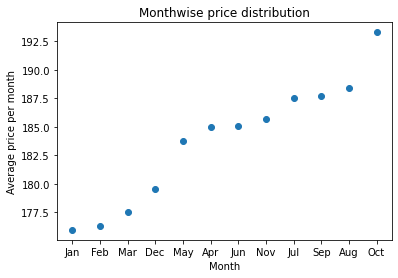

In [43]:
plot_df = pd.DataFrame(master_df.groupby('month')['price'].mean().sort_values(ascending=True))
plot_df.reset_index(inplace=True)
plt.scatter(x=plot_df['month'], y=plot_df['price']);
plt.title('Monthwise price distribution');
plt.ylabel('Average price per month');
plt.xlabel('Month');

As seen above, the prices for listings are maximum in October for all listings.

__Question 2.__ Do superhosts outperform hosts?
<a id='superhosts'></a>

In [44]:
master_df.groupby(['host_is_superhost', 'property_type']).size()

host_is_superhost  property_type  
f                  Apartment          863225
                   Bed & Breakfast     10950
                   Boat                 4015
                   Camper/RV             365
                   Condominium         75190
                   Dorm                  730
                   Entire Floor         1460
                   Guesthouse            365
                   House              168995
                   Loft                12045
                   Other                5475
                   Townhouse           15695
                   Villa                1825
t                  Apartment           91615
                   Bed & Breakfast      4015
                   Boat                  365
                   Condominium          9125
                   House               36135
                   Loft                 2190
                   Other                 730
                   Townhouse            4015
                   V

Text(0.5, 1.0, 'Number of Super Hosts in the dataset')

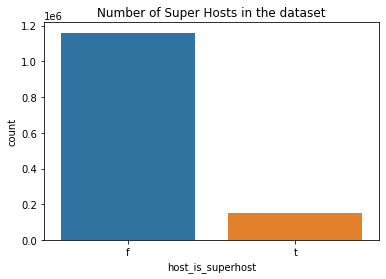

In [45]:
sb.countplot(x=master_df['host_is_superhost'], data=master_df)
plt.title('Number of Super Hosts in the dataset')

In [46]:
master_df.groupby('host_is_superhost').size()

host_is_superhost
f    1160335
t     148555
dtype: int64

In [47]:
master_df.groupby(['host_is_superhost', 'host_response_time']).size() 

host_is_superhost  host_response_time
f                  a few days or more     15695
                   within a day          158410
                   within a few hours    392740
                   within an hour        593490
t                  within a day           12775
                   within a few hours     51830
                   within an hour         83950
dtype: int64

In [48]:
props_df = pd.DataFrame(master_df.groupby(['host_is_superhost', 'host_response_time']).size() / master_df.groupby('host_is_superhost').size())
props_df.reset_index(inplace=True)
props_df.rename(columns = {0 : 'proportion'}, inplace=True)
dictionary = {
    'f' : 'Not a superhost',
    't' : 'Is superhost'
}
props_df.replace({'host_is_superhost':dictionary}, inplace=True)
props_df

,host_is_superhost,host_response_time,proportion
0,Not a superhost,a few days or more,0.013526
1,Not a superhost,within a day,0.136521
2,Not a superhost,within a few hours,0.338471
3,Not a superhost,within an hour,0.511482
4,Is superhost,within a day,0.085995
5,Is superhost,within a few hours,0.348894
6,Is superhost,within an hour,0.565111


Text(0.5, 1.0, 'Response times for superhosts compared to hosts')

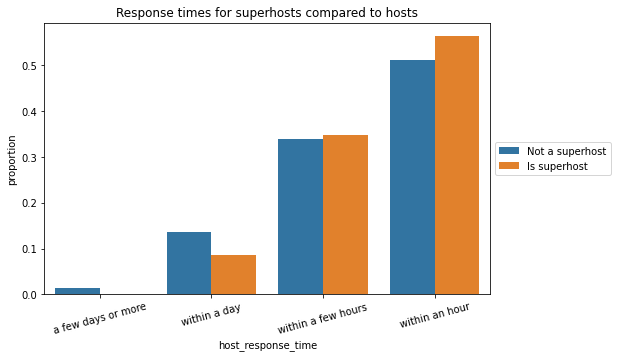

In [49]:
plt.figure(figsize=[8,5])
sb.barplot(data = props_df, x = 'host_response_time', y = 'proportion', hue = 'host_is_superhost')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.xticks(rotation = 15)
plt.title('Response times for superhosts compared to hosts')

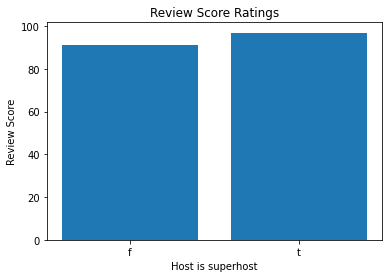

In [50]:
scores_df = pd.DataFrame(master_df.groupby(['host_is_superhost'])['review_scores_rating'].mean())
scores_df.reset_index(inplace=True)
plt.bar(data=scores_df, x='host_is_superhost', height='review_scores_rating');
plt.title('Review Score Ratings');
plt.xlabel('Host is superhost');
plt.ylabel('Review Score');

As seen form the above visualizations, superhosts outperform hosts in terms of review score ratings & response times.

__Question 3.__ Does property type affect pricing?
<a id='propertytype'></a>

In [51]:
master_df.property_type.value_counts()

Apartment          954840
House              205130
Condominium         84315
Townhouse           19710
Bed & Breakfast     14965
Loft                14235
Other                6205
Boat                 4380
Villa                2190
Entire Floor         1460
Dorm                  730
Camper/RV             365
Guesthouse            365
Name: property_type, dtype: int64

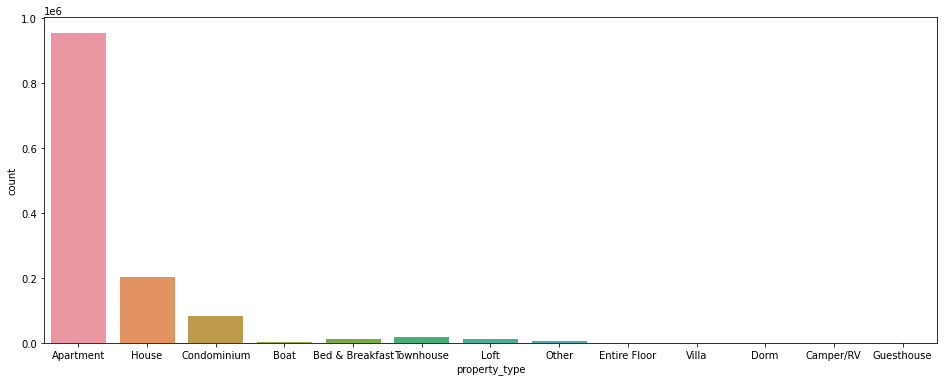

In [52]:
plt.figure(figsize=(16, 6))
sb.countplot(x='property_type', data=master_df)

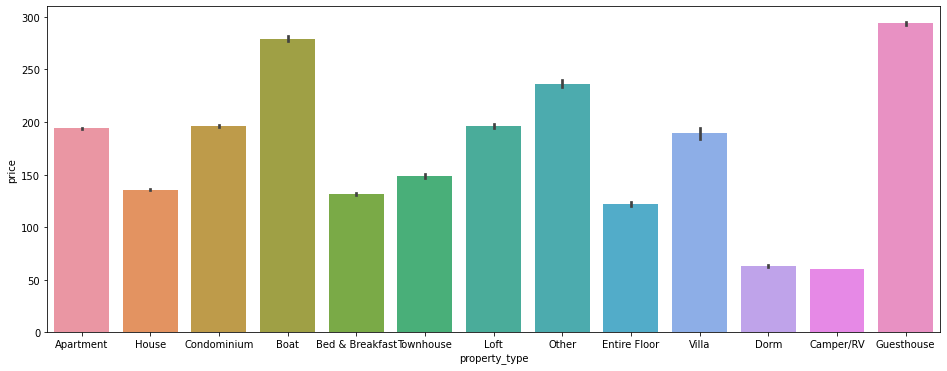

In [53]:
plt.figure(figsize=(16, 6))
sb.barplot(x=master_df['property_type'], y=master_df['price'])

From the above plot, we can see that the property type does affect the pricing. The highest price is of the type Guesthouse, then Boat & so on.

Text(0, 0.5, 'Price')

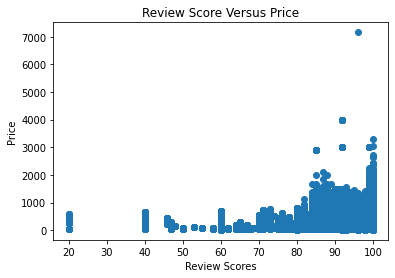

In [54]:
plt.scatter(x=master_df['review_scores_rating'], y=master_df['price']);
plt.title('Review Score Versus Price')
plt.xlabel('Review Scores')
plt.ylabel('Price')

## 4. Modelling Data
<a id='modellingthedata'></a>

__Predicting listing prices using features that relate to them.__

In [55]:
analysis_df = pd.DataFrame(master_df.groupby('listing_id')['price'].mean())
analysis_df.reset_index(inplace=True)
analysis_df.head()

,listing_id,price
0,3353,36.728767
1,5506,147.136986
2,6695,197.136986
3,6976,65.000000
4,8792,154.000000


In [56]:
non_duplicated = master_df.drop_duplicates(['listing_id'])

In [57]:
non_duplicated.drop('price', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [58]:
training_df = analysis_df.set_index('listing_id').join(non_duplicated.set_index('listing_id'))
training_df.reset_index(inplace=True)
training_df = training_df[['price', 'host_response_time', 'host_is_superhost', 'property_type', 'room_type', 'accommodates', \
                          'number_of_reviews', 'review_scores_rating', 'cancellation_policy', 'bathrooms', 
                           'beds', 'bedrooms', 
                          'bed_type', 'reviews_per_month', 'cleaning_fee', 'security_deposit', 
                           'month', 'neighbourhood_cleansed', 
                          '24-Hour Check-in', 'Air Conditioning', 'Breakfast',
                           'Buzzer/Wireless Intercom', 'Cable TV', 'Carbon Monoxide Detector',
                           'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building',
                           'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher',
                           'First Aid Kit', 'Free Parking on Premises',
                           'Free Parking on Street', 'Gym', 'Hair Dryer', 'Hangers',
                           'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet', 'Iron',
                           'Kitchen', 'Laptop Friendly Workspace', 'Lock on Bedroom Door',
                           'Other pet(s)', 'Paid Parking Off Premises', 'Pets Allowed',
                           'Pets live on this property', 'Pool', 'Safety Card', 'Shampoo',
                           'Smoke Detector', 'Smoking Allowed', 'Suitable for Events', 'TV',
                           'Washer', 'Washer / Dryer', 'Wheelchair Accessible',
                           'Wireless Internet']]
training_df.head()

,price,host_response_time,host_is_superhost,property_type,room_type,accommodates,number_of_reviews,review_scores_rating,cancellation_policy,bathrooms,beds,bedrooms,bed_type,reviews_per_month,cleaning_fee,security_deposit,month,neighbourhood_cleansed,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,36.728767,within a few hours,f,Apartment,Private room,1,34,90.0,strict,1.0,1.0,1.0,Real Bed,0.38,50.000000,100.000000,Sep,Allston,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,147.136986,within a day,f,House,Private room,2,36,91.0,strict,1.0,1.0,1.0,Real Bed,0.40,40.000000,324.698212,Sep,Roxbury,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
2,197.136986,within a day,f,Apartment,Entire home/apt,4,47,95.0,strict,1.0,2.0,1.0,Real Bed,0.54,70.000000,324.698212,Sep,Roxbury,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1
3,65.000000,within a few hours,t,Apartment,Private room,2,41,98.0,moderate,1.0,1.0,1.0,Real Bed,0.47,68.380145,324.698212,May,Roslindale,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1
4,154.000000,within a few hours,f,Apartment,Entire home/apt,3,18,91.0,moderate,1.0,1.0,1.0,Real Bed,0.21,250.000000,1000.000000,Sep,Downtown,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [59]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       3585 non-null   float64
 1   host_response_time          3585 non-null   object 
 2   host_is_superhost           3585 non-null   object 
 3   property_type               3585 non-null   object 
 4   room_type                   3585 non-null   object 
 5   accommodates                3585 non-null   int64  
 6   number_of_reviews           3585 non-null   int64  
 7   review_scores_rating        3585 non-null   float64
 8   cancellation_policy         3585 non-null   object 
 9   bathrooms                   3585 non-null   float64
 10  beds                        3585 non-null   float64
 11  bedrooms                    3585 non-null   float64
 12  bed_type                    3585 non-null   object 
 13  reviews_per_month           3585 

In [60]:
# create dummy variables for categorical data
def create_dummy_variables(df):
    '''
    input: a dataframe 
    output: X & y dataframes with values that can be directly inserted into regression model
    '''
    # get the response variable
    y = df['price']
    df.drop('price', axis=1, inplace=True)
    
    categorical_var = df.select_dtypes(include=['object']).copy().columns
    for col in categorical_var:
        df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=False)], axis=1)
    X = df
    return X, y

In [61]:
X, y = create_dummy_variables(training_df)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [1]:
y_test_preds = lm.predict(X_test)
y_train_preds = lm.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
mse_score = mean_squared_error(y_test, y_test_preds)
print("Test Score: {}".format(test_score))

NameError: name 'lm' is not defined

In [64]:
root_mse = mse_score**(1/2)
root_mse

75.37293929274794

In [65]:
coeff = list(zip(lm.coef_, master_df))
coeff

[(8.794349367064074, 'listing_id'),
 (-0.17957916130385845, 'name'),
 (0.5650225469580191, 'host_name'),
 (28.80176630336356, 'host_location'),
 (2.3431499827718367, 'host_response_time'),
 (45.668678656979836, 'host_is_superhost'),
 (-1.5728915118780393, 'host_total_listings_count'),
 (0.13900512909320734, 'neighbourhood_cleansed'),
 (0.03968610194178352, 'city'),
 (-4.749748793971894, 'state'),
 (14.927095919718392, 'zipcode'),
 (9.155923448549789, 'market'),
 (5.940707161539287, 'property_type'),
 (-3.631469405491611, 'room_type'),
 (0.5168936363465051, 'accommodates'),
 (17.306515324834596, 'bathrooms'),
 (44.78524928737869, 'bedrooms'),
 (35.18912196412801, 'beds'),
 (23.970508240623577, 'bed_type'),
 (14.300164852248852, 'number_of_reviews'),
 (-12.970837267580682, 'review_scores_rating'),
 (9.167966219564242, 'cancellation_policy'),
 (12.527399434613173, 'reviews_per_month'),
 (1.2241982503259736, 'cleaning_fee'),
 (-5.497971753172888, 'security_deposit'),
 (-10.29163939930313, 

## 5. Results
<a id='results'></a>

From the above, we can see conclude the following;<br></br>


__Question 1. In which month do the property prices peak?__<br></br>
Prices peak in the month of __October__. This could be due to the fact that there are many conventions in the month of October & hence higher the demand, higher the price per night. Click [here](#pricepeak) to find out.<br>


__2. Do super hosts outperform hosts?__<br></br>
Yes, superhosts do outperform hosts. Superhosts are experienced hosts who provide a shining example for other hosts, and extraordinary experiences for their guests. Once a host reaches Superhost status, a badge superhost badge will automatically appear on their listing and profile to help you identify them. Our analysis shows that majority of the superhosts respond within an hour & hence it keeps the customer's interest intact. The review rating scores for superhosts are also a bit greater than that of hosts by around 6% as shown [here](#superhosts).

__3. Does room type affect the pricing?__<br></br>
Yes property type does affect pricing & can be found [here](#propertytype). The highest price is of the type Guesthouse, then Boat & so on. 

__4. Predict pricing using features that relate to price__.<br></br>
From the coefficients, we can observe that the features that impact the pricing maximum are;
* If the host is a superhost or not: This could be due to the fact that superhosts provide a good holiday experience & customers will likely pay more for a good vacation experience.
* Bedrooms, beds & bed types: This could be due to the fact that the more the bedrooms and beds, the greater the area of the listing and hence greater the rent.
* We can see that the review_scores_rating & the room_type has less or no effect on pricing.
* Amenities like hot tubs, free & paid parking on premises also have an impact on the pricing.

By using these variables and many more, we can provide a better estimate of the price.